In [1]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

[nltk_data] Downloading package stopwords to /home/gg-
[nltk_data]     greenlab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
movie_data = load_files(r"/home/gg-greenlab/Downloads/data")
X, y = movie_data.data, movie_data.target

In [3]:
# Take a look at length of traning data and target
print("Length of traning data - text files: ", len(X))
print("Length of targets - authors: ", len(y))

Length of traning data - text files:  845
Length of targets - authors:  845


In [4]:
# find out average number of words in each text file
length_of_data = []
for i in range(len(X)):
    length_of_data.append(len(X[i]))
ave_num = round(sum(length_of_data)/len(length_of_data))
print("Average number of words in each text file: ", ave_num, "words")

Average number of words in each text file:  373246 words


In [5]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
documents = []
stemmer = WordNetLemmatizer()
for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    # remove "\n"
    document = re.sub(r'\n\s+', ' ', document)
    # remove "\n"
    document = re.sub(r'\r\s+', ' ', document)
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # remove all single "n" characters
    document = re.sub(r'n\s+', ' ', document)
    # remove all single "r" characters
    document = re.sub(r'r\s+', ' ', document)
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

[nltk_data] Downloading package wordnet to /home/gg-
[nltk_data]     greenlab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[60, 71, 61, 58, 89, 72, 86, 88, 79, 84, 97]


Text(0.5, 1.0, 'Total number of texts file for each author')

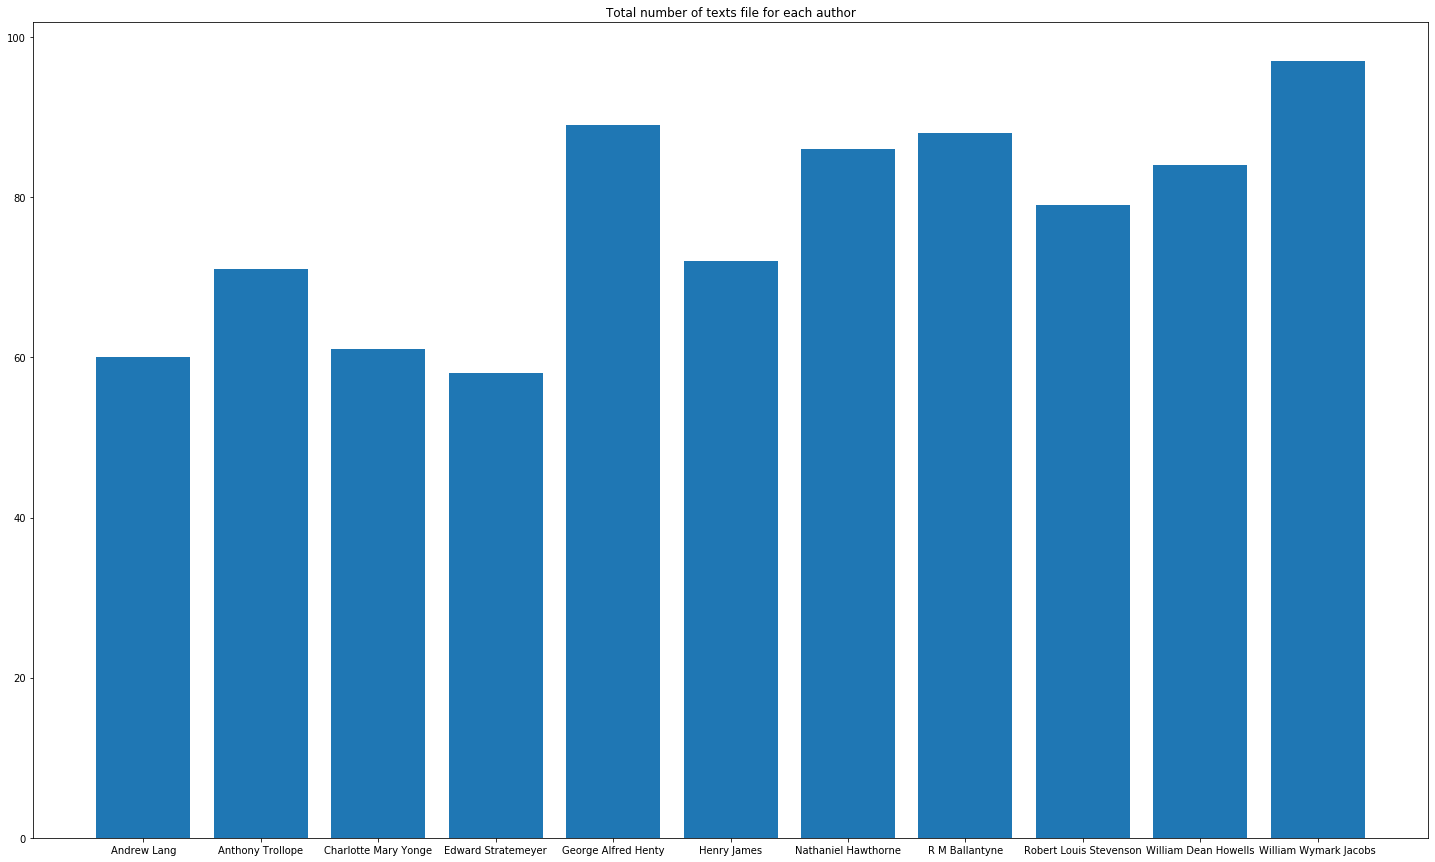

In [6]:
# Let see how many text files data for each author
import matplotlib.pyplot as plt
num_of_labels = [0 for i in range(0,11,1)]
for i in range(len(y)):
    for j in range(len(num_of_labels)):
        if y[i] == j:
            num_of_labels[j] = num_of_labels[j]+1
print(num_of_labels)

labels = ["Andrew Lang", "Anthony Trollope", "Charlotte Mary Yonge", "Edward Stratemeyer", "George Alfred Henty", 
         "Henry James", "Nathaniel Hawthorne", "R M Ballantyne", "Robert Louis Stevenson",
         "William Dean Howells", "William Wymark Jacobs"]

plt.figure(figsize=(25, 15))
plt.bar(labels, num_of_labels)
plt.title('Total number of texts file for each author')

[18910711, 46876869, 33670393, 15766743, 48250749, 21529008, 12928543, 28905041, 26769280, 25178191, 6017547]


Text(0.5, 1.0, 'Total number of words for each author')

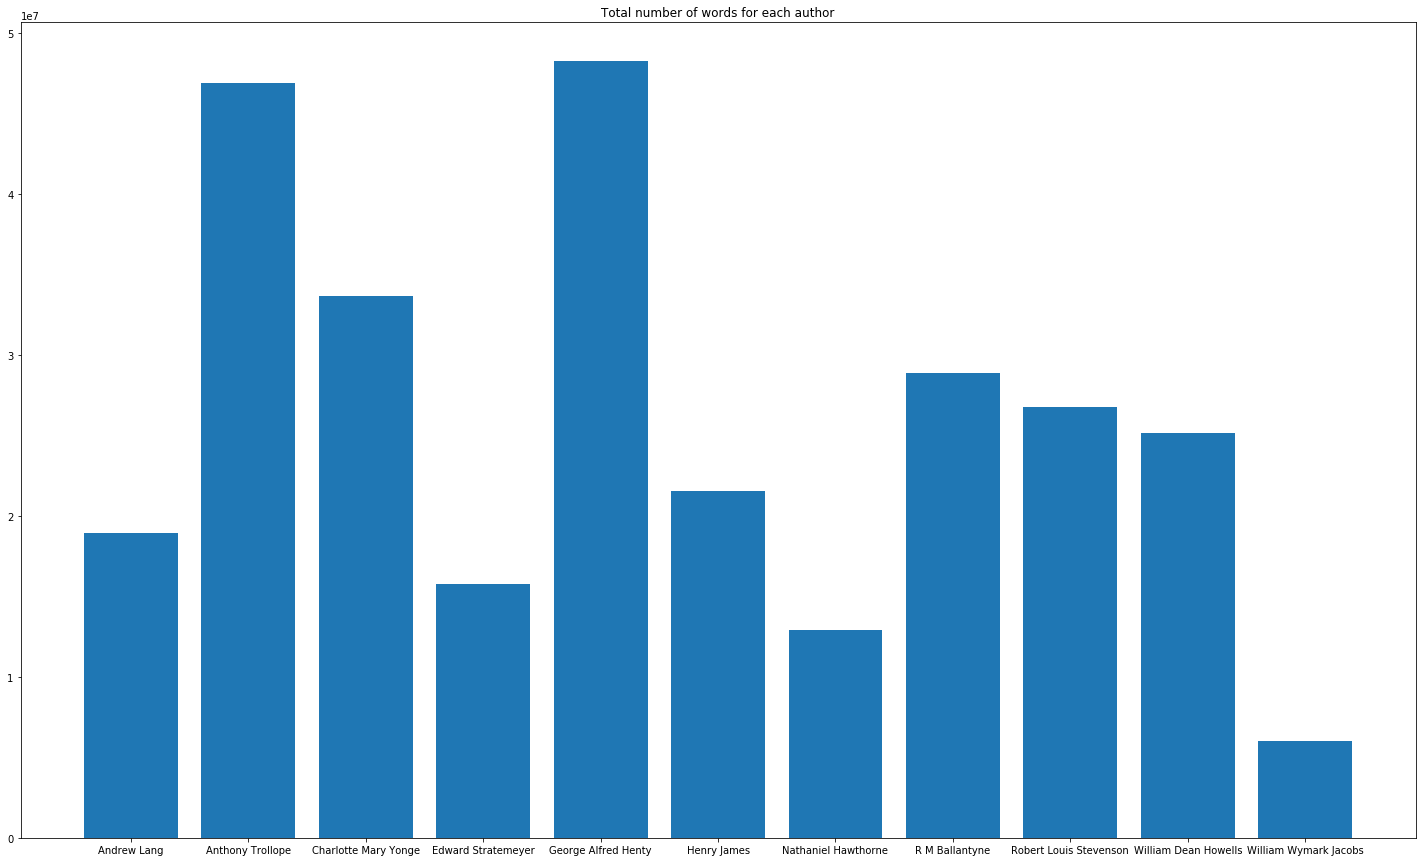

In [7]:
# Let see how many words data for each author
number_of_words = [0 for i in range(0,11,1)]
for i in range(len(y)):
    for j in range(len(number_of_words)):
        if y[i] == j:
            number_of_words[j] = number_of_words[j]+len(documents[i])
print(number_of_words)

labels = ["Andrew Lang", "Anthony Trollope", "Charlotte Mary Yonge", "Edward Stratemeyer", "George Alfred Henty", 
         "Henry James", "Nathaniel Hawthorne", "R M Ballantyne", "Robert Louis Stevenson",
         "William Dean Howells", "William Wymark Jacobs"]

plt.figure(figsize=(25, 15))
plt.bar(labels, number_of_words)
plt.title('Total number of words for each author')

# 5. Similar to 3., but using word2vec.

In [8]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

# load the google word2vec model
filename = '/home/gg-greenlab/Downloads/GoogleNews-vectors-negative300.bin'
# model = KeyedVectors.load_word2vec_format(filename, binary=True, limit = 300000)
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [9]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118192911148071)]


In [10]:
# check max number of words  for each file
check_infor_list = []
for i in range(len(documents)):
    check_infor_list.append(len(documents[i]))
print("Maxinum number of word in this data: ", max(check_infor_list))

Maxinum number of word in this data:  1997391


In [11]:
#importing libraries
import spacy
import datetime
start_time = datetime.datetime.now()
#instantiating English module
nlp = spacy.load('en_core_web_sm')
nlp.max_length = int(max(check_infor_list))+100
word2vec_data = []
for i in range(len(documents)):
    #creating doc object containing our token features
    doc = nlp(documents[i])

    #Creating and updating our list of tokens using list comprehension 
    tokens = [token.text for token in doc]
    word2vec_data.append(tokens)
print("Length of word2vec_data: ", len(word2vec_data))
stop_time = datetime.datetime.now()
cost_time = (stop_time-start_time)
total_seconds = cost_time.total_seconds()
print("Cost time for using spacy step", total_seconds)

Length of word2vec_data:  845
Cost time for using spacy step 13263.925487


In [13]:
import numpy as np
word2vec_data_vec = []
for j in range(len(word2vec_data)):
    vec = []
    for i in range(len(word2vec_data[j])):
        if word2vec_data[j][i] in model.vocab:
            a = np.array(model.get_vector(word2vec_data[j][i]))
            vec.append(a)
    vec = np.array(vec)
    vec_average = np.average(vec, axis=0)
    word2vec_data_vec.append(vec_average)
final_data = np.array(word2vec_data_vec)
print("The shape of final data: ", final_data.shape)

The shape of final data:  (845, 300)


In [14]:
from sklearn.model_selection import train_test_split
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(final_data, y, test_size=0.2, random_state=0)

print("Training data: ", len(X_train_w2v), "for features", len(y_train_w2v), "for targets")
print("Training data: ", len(X_test_w2v), "for features", len(y_test_w2v), "for targets")

Training data:  676 for features 676 for targets
Training data:  169 for features 169 for targets


## Naive Bayes

In [94]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train_w2v, y_train_w2v)
#Predict the response for test dataset
y_pred_w2v = gnb.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_pred_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_pred_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_pred_w2v))

Confusion matrix:  
 [[ 4  0  3  0  0  0  0  1  1  1  0]
 [ 0 11  1  0  1  0  0  0  0  4  0]
 [ 0  1  7  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  1  0  0  0  0  0  0]
 [ 0  4  0  0 16  0  0  1  0  0  0]
 [ 0  0  0  0  0  7  1  0  0  2  0]
 [ 0  0  1  0  0  1 14  1  1  1  0]
 [ 0  0  0  0  0  0  2 17  3  0  0]
 [ 0  0  6  1  0  0  1  3  3  2  0]
 [ 0  0  0  0  0  9  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  0 16]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.69      0.65      0.67        17
           2       0.39      0.88      0.54         8
           3       0.92      0.92      0.92        12
           4       0.89      0.76      0.82        21
           5       0.41      0.70      0.52        10
           6       0.78      0.74      0.76        19
           7       0.74      0.77      0.76        22
           8       0.38      0.19      0.25        16
           9   

## Logistic Regression 

In [39]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_dafault = LogisticRegression(solver='saga')
# fit the model with data
logreg_dafault.fit(X_train_w2v,y_train_w2v)
#Predict the Y values from X_test data
y_pred_LR_w2v = logreg_dafault.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_pred_LR_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_pred_LR_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_pred_LR_w2v))

Confusion matrix:  
 [[ 0  0  0  0  0  0  4  0  1  1  4]
 [ 0  7  0  0  3  3  0  1  0  2  1]
 [ 0  0  0  0  1  3  1  0  0  0  3]
 [ 0  0  0  0  1  0  0  0  0  0 11]
 [ 0  0  0  0 18  2  0  1  0  0  0]
 [ 0  0  0  0  0  7  2  0  0  1  0]
 [ 0  0  0  0  0  0 18  0  0  0  1]
 [ 0  0  0  0  1  0  3 11  0  0  7]
 [ 0  0  0  0  0  0 10  0  0  0  6]
 [ 0  0  0  0  1  7  0  0  0  6  4]
 [ 0  0  0  0  0  0  0  0  0  0 16]]
Classification report:  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       1.00      0.41      0.58        17
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        12
           4       0.72      0.86      0.78        21
           5       0.32      0.70      0.44        10
           6       0.47      0.95      0.63        19
           7       0.85      0.50      0.63        22
           8       0.00      0.00      0.00        16
           9   

## Random Forest 

In [40]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train_w2v, y_train_w2v)
y_pred_rf_w2v = classifier.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_pred_rf_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_pred_rf_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_pred_rf_w2v))

Confusion matrix:  
 [[ 8  0  0  0  0  0  0  0  1  1  0]
 [ 0 13  0  0  1  0  0  0  1  1  1]
 [ 0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  1  0  0  0  0  0  0]
 [ 0  1  1  0 18  0  0  1  0  0  0]
 [ 0  0  0  0  0  8  1  0  1  0  0]
 [ 0  0  1  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  1  0  0  0  1  0 14  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0  0 16]]
Classification report:  
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.93      0.76      0.84        17
           2       0.73      1.00      0.84         8
           3       1.00      0.92      0.96        12
           4       0.90      0.86      0.88        21
           5       1.00      0.80      0.89        10
           6       0.90      0.95      0.92        19
           7       0.96      1.00      0.98        22
           8       0.82      0.88      0.85        16
           9   

## Decision Tree 

In [41]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_w2v,y_train_w2v)
y_pred_DT_w2v = clf.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_pred_DT_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_pred_DT_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_pred_DT_w2v))

Confusion matrix:  
 [[ 6  0  1  0  0  0  0  0  1  1  1]
 [ 1 12  0  0  0  0  1  0  2  1  0]
 [ 1  1  3  0  0  0  0  0  1  1  1]
 [ 0  0  0  9  1  0  0  0  0  0  2]
 [ 0  2  0  0 16  1  1  1  0  0  0]
 [ 0  0  0  0  0  6  0  1  1  1  1]
 [ 3  0  1  0  0  0 11  2  1  1  0]
 [ 2  1  0  1  1  0  1 15  0  1  0]
 [ 1  0  0  0  0  1  1  1 10  2  0]
 [ 0  2  0  1  2  3  1  0  0  9  0]
 [ 1  0  0  1  0  0  0  0  0  1 13]]
Classification report:  
               precision    recall  f1-score   support

           0       0.40      0.60      0.48        10
           1       0.67      0.71      0.69        17
           2       0.60      0.38      0.46         8
           3       0.75      0.75      0.75        12
           4       0.80      0.76      0.78        21
           5       0.55      0.60      0.57        10
           6       0.69      0.58      0.63        19
           7       0.75      0.68      0.71        22
           8       0.62      0.62      0.62        16
           9   

## Decision Tree with Entropy

In [42]:
# Create Decision Tree classifer object with Entropy
clfe = DecisionTreeClassifier(criterion='entropy')
clfe = clfe.fit(X_train_w2v,y_train_w2v)
y_pred_DTe_w2v = clfe.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_pred_DTe_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_pred_DTe_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_pred_DTe_w2v))

Confusion matrix:  
 [[ 7  0  0  0  0  0  1  0  2  0  0]
 [ 0 11  1  0  1  1  0  0  3  0  0]
 [ 2  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  1  9  1  0  0  0  0  0  1]
 [ 0  3  1  1 15  0  0  1  0  0  0]
 [ 0  0  0  0  0  8  1  0  0  1  0]
 [ 0  0  3  0  0  0 13  0  1  1  1]
 [ 0  0  0  0  0  0  0 18  1  3  0]
 [ 1  0  1  0  0  2  2  0  9  0  1]
 [ 1  0  2  0  0  0  2  0  3 10  0]
 [ 0  0  0  0  0  0  0  0  0  0 16]]
Classification report:  
               precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.79      0.65      0.71        17
           2       0.40      0.75      0.52         8
           3       0.90      0.75      0.82        12
           4       0.88      0.71      0.79        21
           5       0.73      0.80      0.76        10
           6       0.68      0.68      0.68        19
           7       0.95      0.82      0.88        22
           8       0.47      0.56      0.51        16
           9   

## Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
clf_GB = GradientBoostingClassifier(random_state=0)
clf_GB.fit(X_train_w2v, y_train_w2v)
y_pred_GB_w2v = clf_GB.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_pred_GB_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_pred_GB_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_pred_GB_w2v))

Confusion matrix:  
 [[ 6  0  0  0  0  0  0  0  3  1  0]
 [ 1 13  1  0  0  1  0  0  1  0  0]
 [ 0  0  6  0  1  0  0  0  1  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0]
 [ 0  2  0  0 18  0  0  1  0  0  0]
 [ 0  0  0  0  0  9  1  0  0  0  0]
 [ 0  0  2  0  0  0 16  0  1  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  1  0]
 [ 1  1  0  1  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0 16]]
Classification report:  
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.81      0.76      0.79        17
           2       0.67      0.75      0.71         8
           3       0.92      1.00      0.96        12
           4       0.95      0.86      0.90        21
           5       0.90      0.90      0.90        10
           6       0.94      0.84      0.89        19
           7       0.96      1.00      0.98        22
           8       0.71      0.94      0.81        16
           9   

## SVM

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
clf_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto',max_iter=200,probability=True))
clf_SVM.fit(X_train_w2v, y_train_w2v)
y_test_SVM_w2v = clf_SVM.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_test_SVM_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_test_SVM_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_test_SVM_w2v))

Confusion matrix:  
 [[ 8  0  0  0  0  0  0  0  1  1  0]
 [ 1 15  0  0  0  0  0  0  1  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0]
 [ 0  1  1  0 18  0  0  1  0  0  0]
 [ 0  0  0  0  0  9  1  0  0  0  0]
 [ 0  0  1  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0  0 16]]
Classification report:  
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.94      0.88      0.91        17
           2       0.80      1.00      0.89         8
           3       1.00      1.00      1.00        12
           4       1.00      0.86      0.92        21
           5       1.00      0.90      0.95        10
           6       0.95      0.95      0.95        19
           7       0.96      1.00      0.98        22
           8       0.89      1.00      0.94        16
           9   

## KNN 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_w2v, y_train_w2v)
y_test_knn_w2v = neigh.predict(X_test_w2v)
print("Confusion matrix: ", "\n", confusion_matrix(y_test_w2v,y_test_knn_w2v))
print("Classification report: ", "\n", classification_report(y_test_w2v,y_test_knn_w2v))
print("Accuracy score: ", accuracy_score(y_test_w2v, y_test_knn_w2v))

Confusion matrix:  
 [[ 8  0  0  0  0  0  0  0  1  1  0]
 [ 1 11  1  0  1  0  0  2  1  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  1  0 19  0  0  1  0  0  0]
 [ 0  0  0  0  0  9  1  0  0  0  0]
 [ 0  0  1  0  0  0 16  0  2  0  0]
 [ 0  0  0  0  0  0  0 20  2  0  0]
 [ 0  0  0  0  0  1  0  0 14  1  0]
 [ 0  0  1  0  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0  0  0  0  0 16]]
Classification report:  
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       1.00      0.65      0.79        17
           2       0.67      1.00      0.80         8
           3       1.00      1.00      1.00        12
           4       0.95      0.90      0.93        21
           5       0.90      0.90      0.90        10
           6       0.94      0.84      0.89        19
           7       0.87      0.91      0.89        22
           8       0.70      0.88      0.78        16
           9   

In [46]:
######### USING WORD2VEC (SMALL DATA - 84)
# 1. Accuracy score with Naive Bayes: 0.6470588235294118
# 2. Accuracy score with Logistic Regression: 0.11764705882352941 
# 3. Accuracy score with Random Forest: 0.7058823529411765 
# 4. Accuracy score with Decision Tree: 0.4117647058823529 and 0.29411764705882354(Entropy)
# 5. Accuracy score with Gradient Boosting: 0.5294117647058824
# 6. Accuracy score with SVM(Support Vector Machines): 0.5882352941176471
# 7. Accuracy score with KNN: 0.6470588235294118

######### USING WORD2VEC (BIGGER DATA - 845)
# 1. Accuracy score with Naive Bayes: 0.6804733727810651
# 2. Accuracy score with Logistic Regression: 0.4911242603550296
# 3. Accuracy score with Random Forest:  0.9112426035502958
# 4. Accuracy score with Decision Tree: 0.650887573964497 and 0.7218934911242604(with Entropy)
# 5. Accuracy score with Gradient Boosting: 0.8757396449704142
# 6. Accuracy score with SVM(Support Vector Machines): 0.9467455621301775
# 7. Accuracy score with KNN: 0.8875739644970414

# 6. Appy RNN to do classification 

In [24]:
from keras.utils import to_categorical
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# # Max number of words in each complaint.
# MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

X_RNN = final_data
Y_RNN = to_categorical(y, 11)

print('Shape of data tensor:', X_RNN.shape)
print('Shape of label tensor:', Y_RNN.shape)

X_train_RNN, X_test_RNN, Y_train_RNN, Y_test_RNN = train_test_split(X_RNN, Y_RNN, test_size=0.2, random_state=1)

print(X_train_RNN.shape,Y_train_RNN.shape)
print(X_test_RNN.shape,Y_test_RNN.shape)

Shape of data tensor: (845, 300)
Shape of label tensor: (845, 11)
(676, 300) (676, 11)
(169, 300) (169, 11)


## Network 1 

In [27]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout
from keras.layers import MaxPooling1D, Conv1D, Flatten, LSTM

model_RNN = Sequential()
model_RNN.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_RNN.shape[1]))

model_RNN.add(Dropout(0.2))

model_RNN.add(LSTM(units=64, return_sequences=True, return_state=False))
model_RNN.add(Dropout(0.2))

model_RNN.add(LSTM(units=32, return_sequences=True, return_state=False))
model_RNN.add(Dropout(0.2))

model_RNN.add(Flatten())

# model_RNN.add(Dense(16, activation='relu'))
# model_RNN.add(Dropout(0.2))

model_RNN.add(Dense(11, activation='softmax'))

model_RNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_RNN.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 300, 100)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 300, 64)           42240     
_________________________________________________________________
dropout_7 (Dropout)          (None, 300, 64)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 300, 32)           12416     
_________________________________________________________________
dropout_8 (Dropout)          (None, 300, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9600)             

In [28]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
epochs = 10
batch_size = 128

history = model_RNN.fit(X_train_RNN, Y_train_RNN, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', 
                                                                  patience=3, min_delta=0.001)])
# history = model_RNN.fit(X_train_RNN, Y_train_RNN, epochs=epochs, batch_size=batch_size,
#                     validation_split=0.1)

Epoch 1/10
5/5 [==============================] - 4s 540ms/step - loss: 2.3984 - accuracy: 0.1098 - val_loss: 2.3951 - val_accuracy: 0.0441
Epoch 2/10
5/5 [==============================] - 2s 424ms/step - loss: 2.3945 - accuracy: 0.1222 - val_loss: 2.3890 - val_accuracy: 0.1765
Epoch 3/10
5/5 [==============================] - 2s 404ms/step - loss: 2.3889 - accuracy: 0.1092 - val_loss: 2.3947 - val_accuracy: 0.0441
Epoch 4/10
5/5 [==============================] - 2s 420ms/step - loss: 2.3821 - accuracy: 0.1121 - val_loss: 2.3942 - val_accuracy: 0.0441
Epoch 5/10
5/5 [==============================] - 2s 420ms/step - loss: 2.3784 - accuracy: 0.1318 - val_loss: 2.3975 - val_accuracy: 0.0441


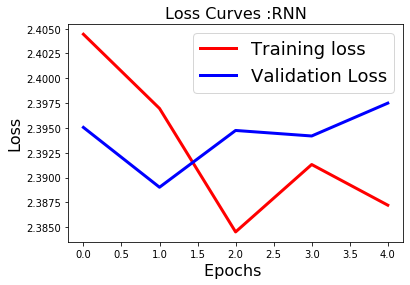

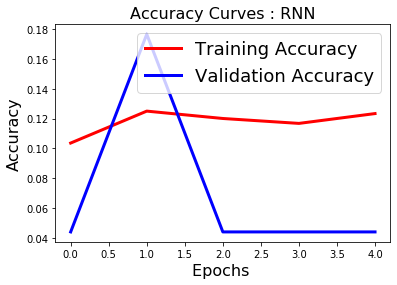

In [29]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN',fontsize=16)
fig1.savefig('loss_rnn.png')

plt.show()

fig2=plt.figure()
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : RNN',fontsize=16)
fig2.savefig('accuracy_rnn.png')
plt.show()

## Network 2 

In [19]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 1000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 300

model_RNN_2 = Sequential()
model_RNN_2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_RNN.shape[1]))
model_RNN_2.add(SpatialDropout1D(0.2))
model_RNN_2.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model_RNN_2.add(Dense(11, activation='softmax'))
# model_RNN_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_RNN_2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          300000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 300, 300)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dense_1 (Dense)              (None, 11)                715       
Total params: 394,155
Trainable params: 394,155
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model_RNN_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_2 = model_RNN_2.fit(X_train_RNN, Y_train_RNN, epochs=5, batch_size=64)

test_loss, test_acurracy = model_RNN_2.evaluate(X_test_RNN, Y_test_RNN)

print("Test accuracy: {}".format(test_acurracy))

Epoch 1/5
11/11 [==============================] - 5s 353ms/step - loss: 2.3944 - accuracy: 0.1006
Epoch 2/5
11/11 [==============================] - 4s 349ms/step - loss: 2.3910 - accuracy: 0.1344
Epoch 3/5
11/11 [==============================] - 4s 338ms/step - loss: 2.3857 - accuracy: 0.1298
Epoch 4/5
11/11 [==============================] - 4s 337ms/step - loss: 2.3788 - accuracy: 0.1115
Epoch 5/5
6/6 [==============================] - 0s 37ms/step - loss: 2.4124 - accuracy: 0.0769
Test accuracy: 0.07692307978868484


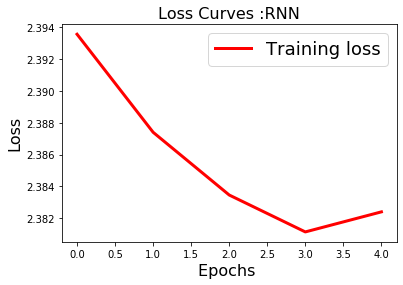

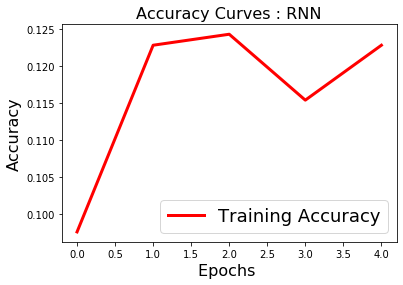

In [23]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
plt.plot(history_2.history['loss'],'r',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN',fontsize=16)
fig1.savefig('loss_rnn.png')
plt.show()

fig2=plt.figure()
plt.plot(history_2.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : RNN',fontsize=16)
fig2.savefig('accuracy_rnn.png')
plt.show()

## BERT 

In [33]:
# Libraries

import matplotlib.pyplot as plt
import pandas as pd
import torch

# Preliminaries
# from torchtext.data import Field, TabularDataset, BucketIterator, Iterator

# Models
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification

# Training
import torch.optim as optim

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns